# TEXT MINING
- **Σκοπός:** η εξοικείωση με τεχνικές text mining καθώς και απλών εργαλείων μηχανικής μάθησης για ανάλυση και ταξινόμηση κειμένου.
- **Στόχος:** η δημιουργία μοντέλου πρόβλεψης που να αναγνωρίζει εάν ένα μήνυμα SMS είναι ανεπιθύμητο ή όχι.
- **Dataset:** [SMS-SPAM](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset/data) από UCI Machine Learning Repository. 



**LOADING DATASET**


In [2]:
import pandas as pd

data = pd.read_csv('spam.csv', encoding="ISO-8859-1")

data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**PREPROCESS DATA**

Προεπεξεργασίας των Μηνυμάτων: 

Χρησιμοποιούμε τις βιβλιοθήκες re και stopwords της βιβλιοηθήκης nltk. H re αφορά την επεξεργασία κειμένου μέσω κανονικών εκφράσεων, δηλαδή επιτρέπει την εύρεση, αντικατάσταση ή και αφαίρεση συγκεκριμένων μοτίβων μέσα στα μηνύματα. Ενώ η stopwords προσφέρει λίστες κοινών λέξεων, οι οποίες είναι λιγότερο σημαντικές για την ανάλυση των μηνυμάτων και γι αυτό αφαιρούνται. 

Αρχικά, φορτώνουμε μια λίστα stopwords και γίνεται χρήση του τύπου δεδομένων set, όπου το μετατρέπει σε ένα σύνολο αφαιρώντας τα διπλότυπα και προσφέροντας ταχύτερη αναζήτηση. 

Στη συνέχεια, για την προεπεξεργασία των μηνυμάτων γίνεται μετατροπή σε πεζά γράμματα, αφαίρεση χαρακτήρων, κενών, σημείων στίξης, αριθμούς και stopwords. Τέλος εφαρμόζουμε τη συνάρτηση σε κάθε τιμή της στήλης v2. 

In [5]:
import re
from nltk.corpus import stopwords


In [6]:
# Λήψη stopwords
stop_words = set(stopwords.words('english'))

In [7]:
# Συνάρτηση για την προεπεξεργασία του κειμένου
def preprocess_text(text):
    # Μετατροπή σε πεζά
    text = text.lower()
    # Αφαίρεση αριθμών και σημείων στίξης
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text) 
    # Αφαίρεση stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Εφαρμογή της προεπεξεργασίας σε όλα τα μηνύματα
data['v2'] = data['v2'].apply(preprocess_text)

In [4]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,go jurong point crazy available bugis n great ...,NaN,NaN,NaN
1,ham,ok lar joking wif u oni,NaN,NaN,NaN
2,spam,free entry wkly comp win fa cup final tkts st ...,NaN,NaN,NaN
3,ham,u dun say early hor u c already say,NaN,NaN,NaN
4,ham,nah dont think goes usf lives around though,NaN,NaN,NaN


**Definition of features (X) and target (y)**

Ο διαχωρισμός των χαρακτηριστικών και του label είναι απαραίτητη διαδικασία για να εκπαιδεύσουμε ένα μοντέλο μηχανικής μάθησης. <br> Συγκεκριμένα στη μεταβλητή X τοποθετούμε τα δεδομένα της στήλης v2, τα οποία θα χρησιμοποιήθουν για την πρόβλεψη και στη μεταβλητή y τοποθετούμε τα δεδομένα της στήλης v1 που έχουν το class, είτε spam είτε ham.

In [5]:
X = data['v2']
y = data['v1']

**TRAIN-TEST SPLIT**

Διαχωρίζουμε τα δεδομένα σε train και test, όπου train=80% και test=20%

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**FEATURE EXTRACTION**

Χρησιμοποιούμε την τεχνική TF IDF VECTORIZER για την μετατροπή των μηνυμάτων σε αριθμητική μορφή, ώστε να ακολουθήσει η διαδικασία του αλγορίθμου μηχανικής μάθησης (Decision Tree), ενώ ταυτόχρονα συμβάλει στην εστίαση των αντιπροσωπευτικών λέξεων SMS και στον περιορισμό των ασήμαντων και κοινών λέξεων.

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Δημιουργία του TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Μετατροπή των κειμένων σε χαρακτηριστικά
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

**Training the Decision Tree**

Με την χρήση της βιβλιοθήκης sklearn.tree εκτελέστηκε ο αλγόριθμος Decision Tree με περιορισμένο βάθος 3 για την αποφυγή υπερεκπαίδευσης του αλγορίθμου, καθώς και την δυνατή οπτικοποίηση του

In [8]:
from sklearn.tree import DecisionTreeClassifier

# Εκπαίδευση του μοντέλου Decision Tree με περιορισμένο βάθος 3
model_dt = DecisionTreeClassifier(max_depth=3, random_state=42) 
model_dt.fit(X_train_tfidf, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

**Model Evaluation**

Έπειτα χρησιμοποιούμε το εκπαιδευμένο μοντέλο "model_dt" ώστε να προβλέψει τις κλάσεις του δοκιμαστικού συνόλου "X_test_tfidf". <br> Αυτά αποθηκεύτηκαν στο "y_pred_dt" και με βάσει τη βιβλιοθήκη sklearn.metrics υπολογίζουμε accuracy, precision, recall, f1-score, support και confusion matrix. <br> Η ακρίβεια (accuracy) του μοντέλου σημειώθηκε 93.90%

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
y_pred_dt = model_dt.predict(X_test_tfidf)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {accuracy_dt * 100:.2f}%")

print(classification_report(y_test, y_pred_dt))

Accuracy: 93.90%
              precision    recall  f1-score   support

         ham       0.94      0.99      0.97       965
        spam       0.89      0.62      0.73       150

    accuracy                           0.94      1115
   macro avg       0.92      0.80      0.85      1115
weighted avg       0.94      0.94      0.93      1115



In [11]:
# Πίνακας Σύγχυσης 
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:\n", cm_dt)


Confusion Matrix:
 [[954  11]
 [ 57  93]]


**VISUALIZATION**

Στην οπτικοποιήση του πίνακα σύγχησης αναδεικνύονται τα εξής αποτελέσματα:<br>True Positive = 954<br>True Negative = 93<br>False Positive = 57<br>False Negative = 11 

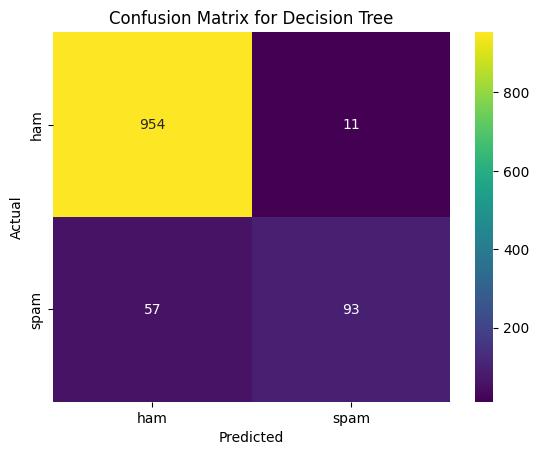

In [12]:
# Οπτικοποίηση του πίνακα σύγχυσης
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="viridis", xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

Στην οπτικοποιήση του Decision Tree αναδεικνύονται τα εξής αποτελέσματα:<br>
-Κόμβοι:<br>
Τη συνθήκη <br>
Τον αριθμό των δειγμάτων στον κόμβο<br>
Τις κατηγορίες και τις πιθανότητες<br>
-Κλάδοι:<br>
Δείχνουν τις αποφάσεις που λαμβάνει το δέντρο βάσει της συνθήκης<br>
-Φύλλα:<br>
Οι τερματικοί κόμβοι δείχνουν την τελική απόφαση ταξινόμησης (ham ή spam)<br>

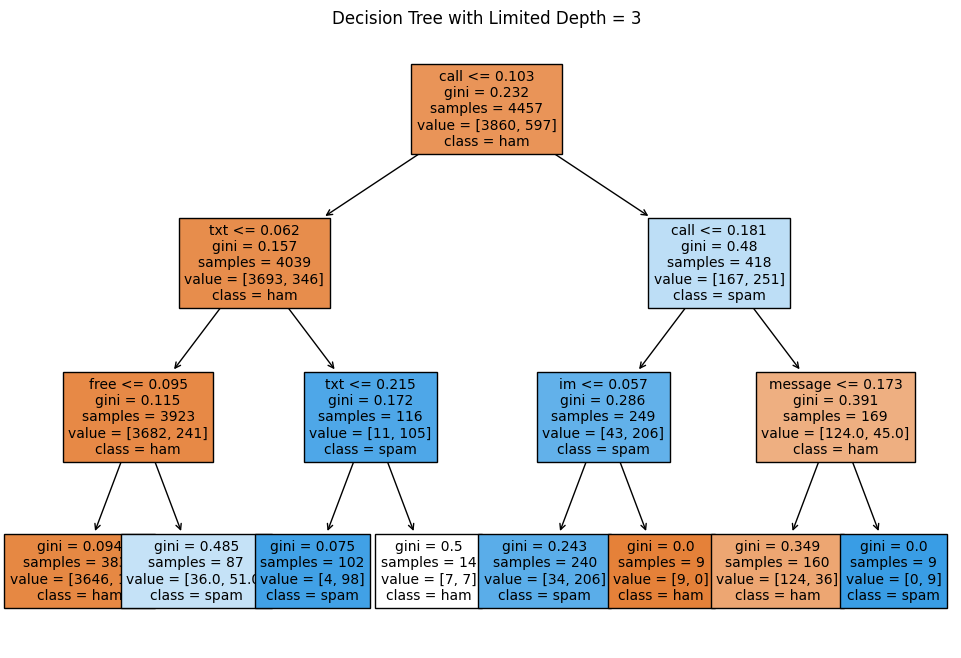

In [13]:
from sklearn.tree import plot_tree

# Οπτικοποίηση του Decision Tree
plt.figure(figsize=(12, 8)) 
plot_tree(model_dt, filled=True, feature_names=vectorizer.get_feature_names_out(), class_names=['ham', 'spam'], fontsize=10)
plt.title("Decision Tree with Limited Depth = 3")
plt.show()